### Importing Libraries


In [42]:

import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer

### Data

https://www.kaggle.com/datasets/zeeshanyounas001/email-spam-detection

In [44]:
df=pd.read_csv('spam.csv')

In [45]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [46]:
df.	Category.unique()#ham means not spam 

array(['ham', 'spam'], dtype=object)

<Axes: ylabel='count'>

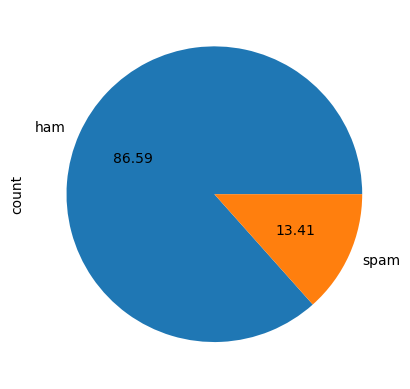

In [47]:
df.	Category.value_counts().plot(kind='pie',autopct='%.2f')

In [48]:
# Transforming data into numberical 

In [49]:
df['Category']=pd.get_dummies(df.Category,drop_first='ham').astype(int) # into 0's and 1's

In [50]:
y=df.iloc[:,:-1]#Category

In [51]:
x=df.iloc[:,-1]#Message

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

In [53]:
cv=CountVectorizer()# to convert Message into Numberical Data

In [54]:
x_train=cv.fit_transform(x_train)
x_test=cv.transform(x_test)

In [55]:
x_train.toarray().shape

(4179, 7449)

In [56]:
import pickle #to deploy our model

with open('model_cv.pkl','wb') as file:
    pickle.dump(cv,file)

In [57]:
gb=GaussianNB() # works better in spam detection

In [58]:
gb.fit(x_train.toarray(),y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [59]:
y_pred=gb.predict(x_test.toarray())

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      1202
           1       0.59      0.91      0.71       191

    accuracy                           0.90      1393
   macro avg       0.79      0.90      0.83      1393
weighted avg       0.93      0.90      0.91      1393



In [61]:
import pickle

with open('model_nb.pkl','wb') as file:
    pickle.dump(gb,file)